# Seaborn Guide: Data Visualization in Python

Seaborn is a Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. Here's a comprehensive guide to using Seaborn effectively


## Installation

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You'll also need these dependencies:

In [8]:
pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


## Importing

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

## Basic Setup

In [84]:
# Set style
sns.set_theme(style="darkgrid")  # Other options: "darkgrid", "white", "dark", "ticks"

# Example dataset
tips = sns.load_dataset("tips")

print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


## Common Plot Types
### 1. Distribution Plots
#### Histogram:

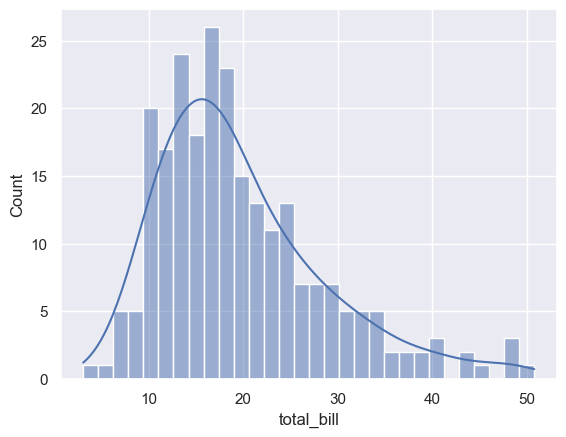

In [85]:

sns.histplot(data=tips, x="total_bill", bins=30, kde=True)
plt.show()

#### what is a **bin**
a bin is like a box storing range of values📦

📊 Think of it like this:
Imagine you have test scores from 0 to 100 for 100 students. To see how many students scored in certain ranges, you can group the scores into bins, like:

0–10

10–20

20–30

...

90–100

Each of these ranges is a bin. The histogram will show how many data points fall into each bin.

#### Determining Bins in Seaborn
##### 1. Square Root Rule (Simple Approach)
n_bins = int(np.sqrt(len(data)))
##### 2. Sturges' Formula (Good for normal distributions)
n_bins = int(np.log2(len(data)) + 1)
##### 3. Freedman-Diaconis Rule (Robust for outliers)
q75, q25 = np.percentile(data, [75, 25])

iqr = q75 - q25

bin_width = 2 * iqr / (len(data) ** (1/3))

n_bins = int((max(data) - min(data)) / bin_width)
##### 4. Rice Rule
n_bins = int(2 * (len(data) ** (1/3)))

#### Choosing the Right Approach
1. For small datasets (<200 points): Use fewer bins (Sturges or Square Root)

2. For larger datasets: Use Freedman-Diaconis or Rice Rule

3. For skewed distributions: More bins often work better

4. When outliers exist: Freedman-Diaconis is most robust

**KDE**: draws a smooth curve that shows where the data is concentrated when true.

#### Kernel Density Estimate (KDE):

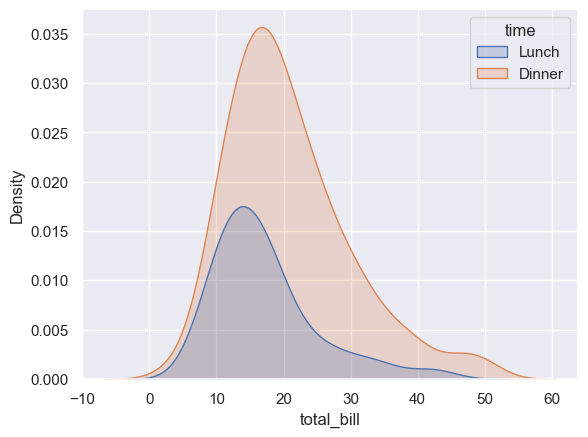

In [86]:
sns.kdeplot(data=tips, x="total_bill", hue="time", fill=True)
plt.show()

### 2. Categorical Plots
#### Bar plot:

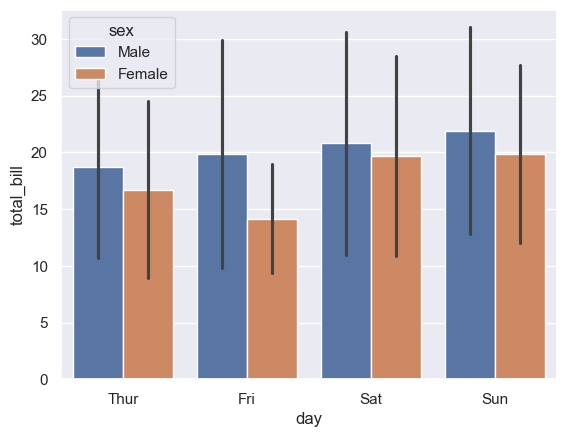

In [87]:
sns.barplot(data=tips, x="day", y="total_bill", hue="sex", errorbar="sd")
plt.show()

**errorbar**:vertical lines that usually display the standard deviation(sd), confidence interval(ci) or standard error(se)

#### Count plot:

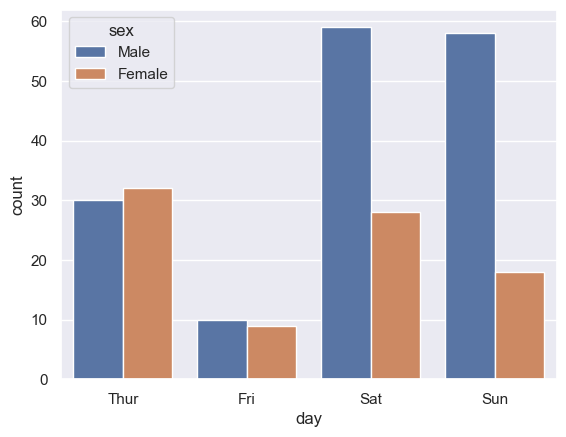

In [88]:
sns.countplot(data=tips, x="day", hue="sex")
plt.show()

#### Box plot:

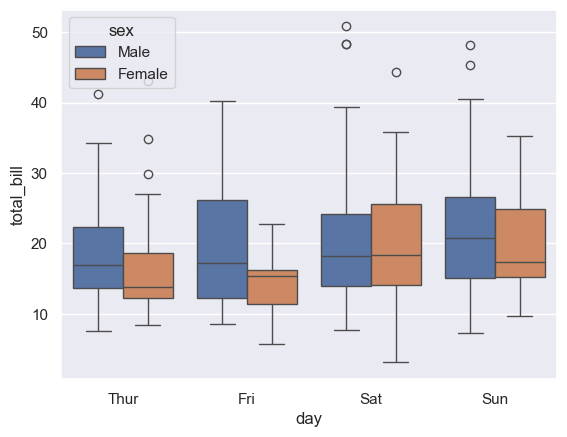

In [89]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex")
plt.show()

#### Violin plot:

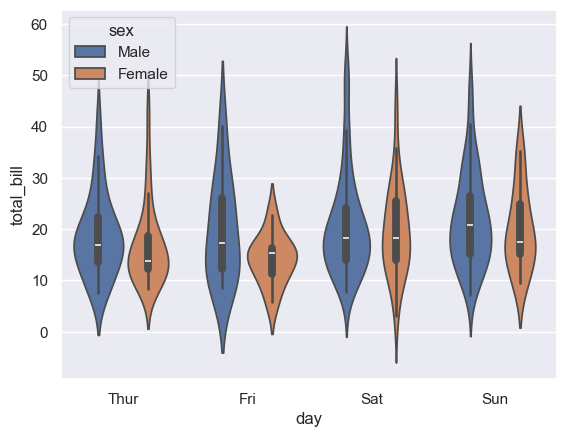

In [90]:
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", dodge = True)
plt.show()

**dodge**: visually separates categories that share the same axis by positioning the elements side by side instead of overlapping them. 

### 3. Relational Plots
#### Scatter plot:

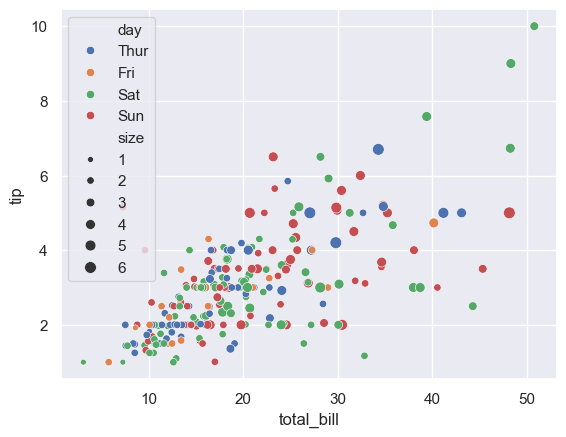

In [91]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day", size="size")
plt.show()

***Obs***: in this sceneario, size is used to define the size of the dots based on a numerical column, but it has another usages depending on the context.

#### Line Plot:

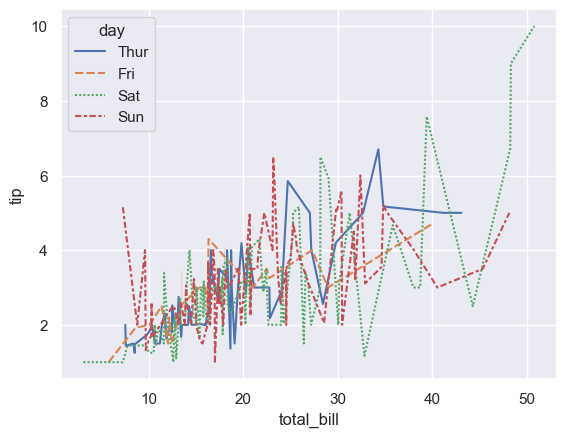

In [92]:
sns.lineplot(data=tips, x="total_bill", y="tip", hue="day", style="day")
plt.show()

**Style**: used to visually differentiate lines or markers when displaying different types of data.

### 4. Regression Plots
#### Regression plot:

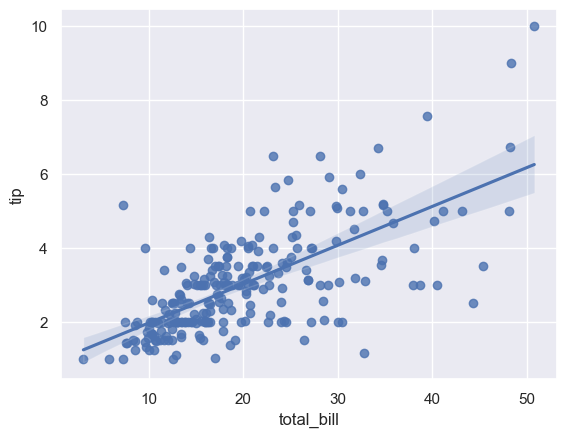

In [93]:
sns.regplot(data=tips, x="total_bill", y="tip")
plt.show()

#### LM plot:

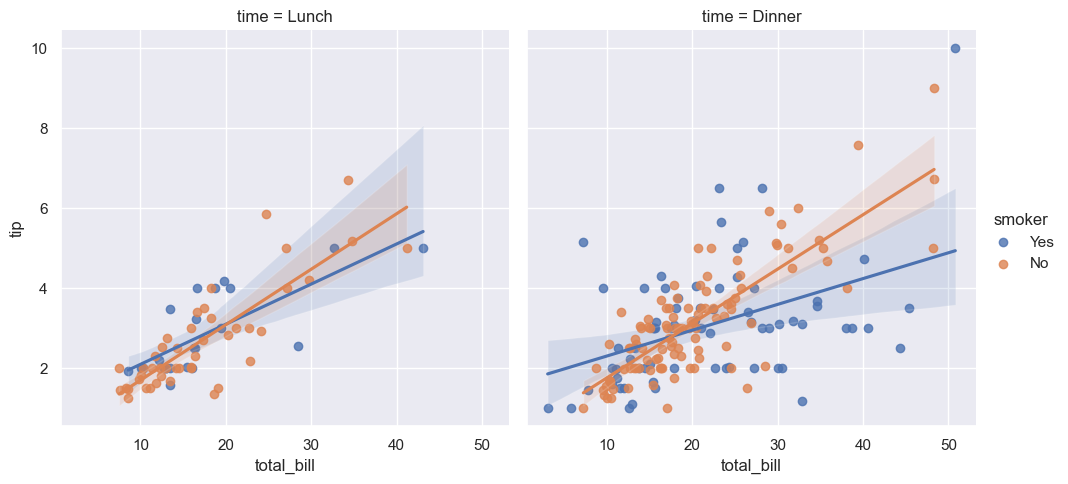

In [94]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", col="time")
plt.show()

**col**: splits the plot into multiple subplots based on the unique values in the specified column, arranging them horizontally.

### 5. Matrix Plots
#### Heatmap:

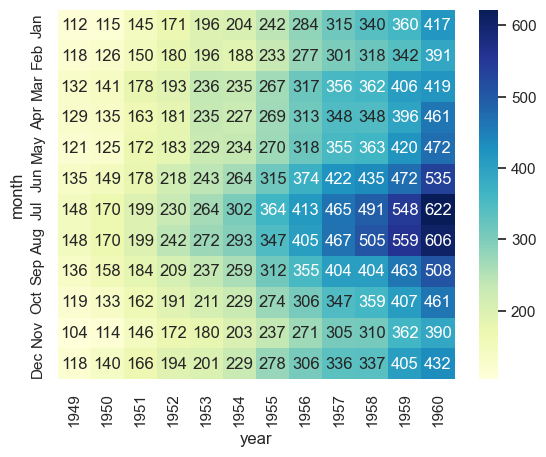

In [95]:
flights = sns.load_dataset("flights")
flights_pivot = flights.pivot(index="month", columns="year", values="passengers")
sns.heatmap(flights_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

**annot**: displays the numerical values inside the plot elements — most commonly used in heatmaps to show the values of each cell.

**fmt**: controls the formatting of the annotated text (used with annot=True), such as the number of decimal places or display style. Commonly used in heatmaps.

commonly used:

- fmt=".1f" → one decimal place, e.g., 3.1

- fmt="d" → integer format, e.g., 42

- fmt=".0%" → percentage without decimals, e.g., 78%

**cmap:** short for colormap, it defines the color gradient used to represent numerical values in plots such as heatmaps, KDE plots, and scatterplots with continuous variables.

#### Cluster map:

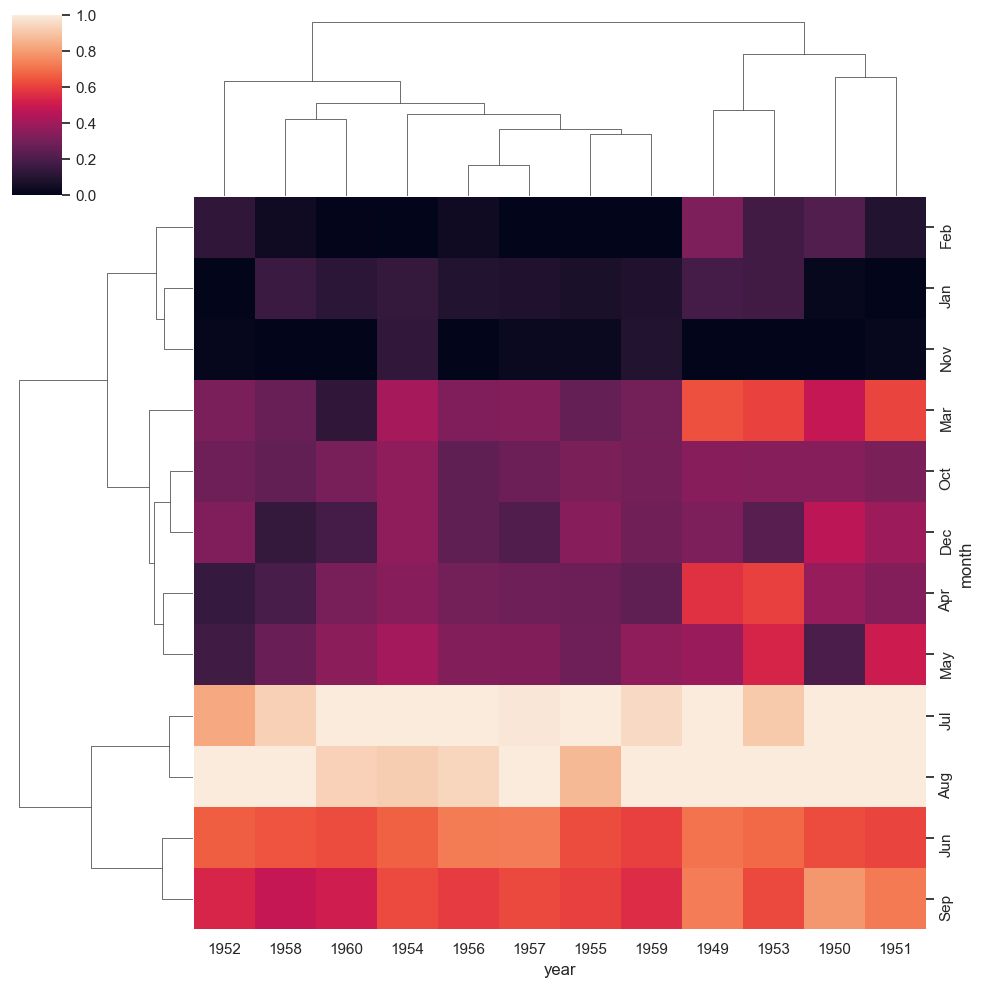

In [96]:
sns.clustermap(flights_pivot, standard_scale=1)
plt.show()

### Advanced Features

#### Facet Grids

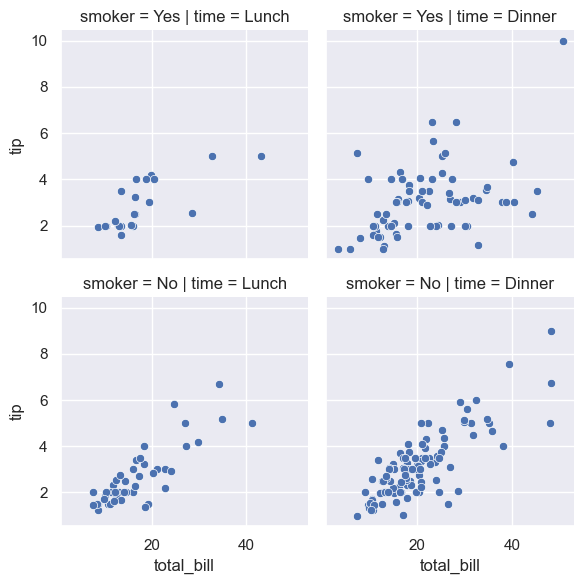

In [97]:
g = sns.FacetGrid(tips, col="time", row="smoker")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()

**row**: creates horizontal panels (rows) of plots grouped by a categorical variable.

#### Pair Plots

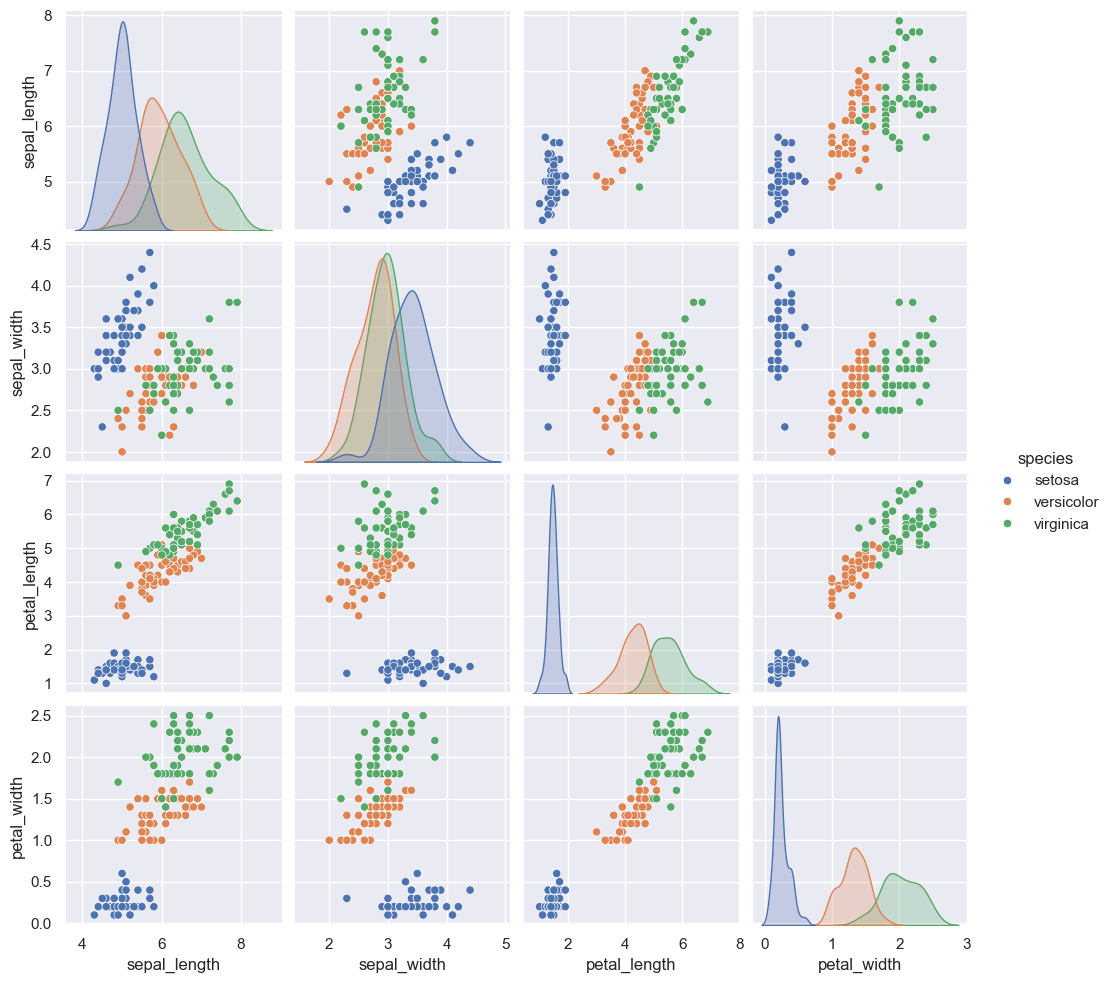

In [98]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")
plt.show()

#### Joint Plots

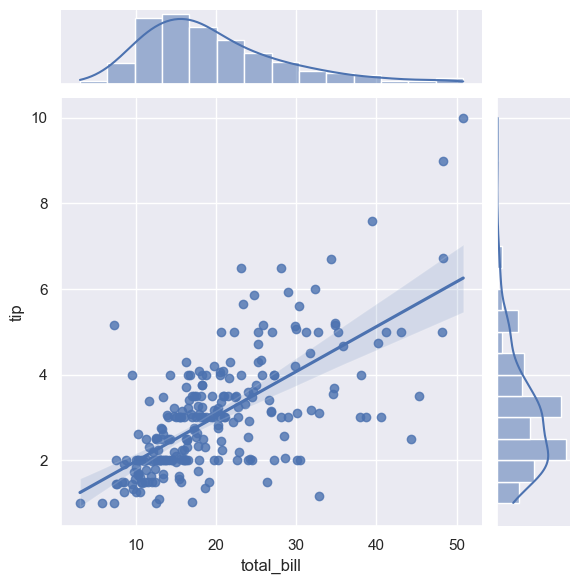

In [99]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")
plt.show()

### Customization

#### Styling

In [100]:
sns.set_style("darkgrid")  # Background style
sns.set_palette("husl")    # Color palette
sns.set_context("paper")   # Scale elements ("talk", "poster", etc.)

#### Figure Size

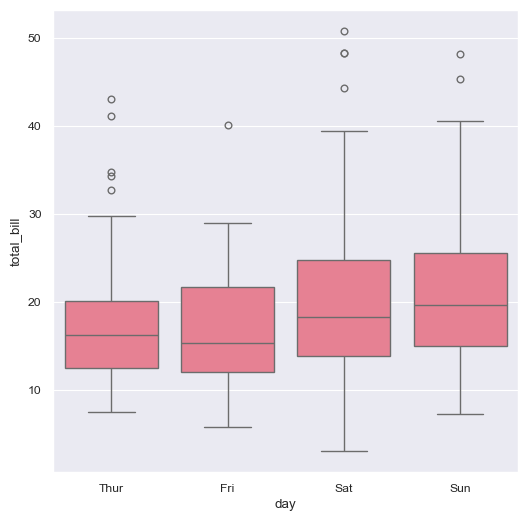

In [102]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=tips, x="day", y="total_bill")
plt.show()

#### Titles and Labels

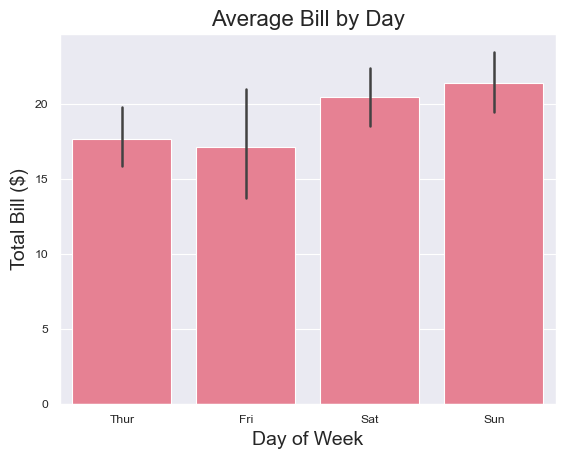

In [103]:
ax = sns.barplot(data=tips, x="day", y="total_bill")
ax.set_title("Average Bill by Day", fontsize=16)
ax.set_xlabel("Day of Week", fontsize=14)
ax.set_ylabel("Total Bill ($)", fontsize=14)
plt.show()

#### Saving Plots

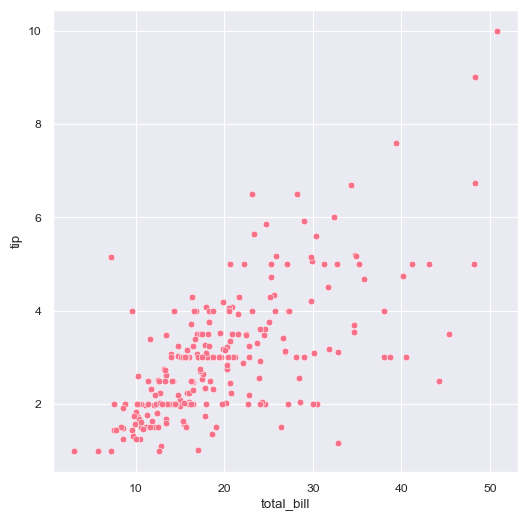

In [106]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.savefig("scatterplot.png", dpi=600, bbox_inches="tight")

**DPI(dots per inch)**: is a measurement of resolution that determines how many pixels will be used per inch in the generated image

- common values
  - dpi=72(standard for screens)
  - dpi=300(quality for impression)
  - dpi=600(high professional quality)

### Tips for Effective Visualization

1. Choose the right plot type for your data

2. Use color meaningfully (hue parameter)

3. Add titles and labels for clarity

4. Consider faceting for complex relationships

5. Adjust figure size for readability

6. Use consistent styles across multiple plots

7. Limit the number of categories shown at once

8. Consider adding annotations for important points

Seaborn integrates well with pandas DataFrames and works alongside matplotlib, allowing you to further customize plots using matplotlib functions when needed.